In [2]:
# Block 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [6]:
# Block 2: Load and inspect CSV data
csv_file_path = "/home/jmframe/data/CAMELS_US/hourly/usgs_streamflow/01187300-usgs-hourly.csv"

# Read the CSV into a DataFrame, specifying the date column as the index
df_csv = pd.read_csv(csv_file_path, parse_dates=["date"], index_col="date")

# Inspect the first few rows to ensure it's loaded correctly
print(df_csv.head())

                     QObs(mm/h)  QObs count     qualifiers  utcoffset(h)  \
date                                                                       
1990-10-01 05:00:00    0.013851           1         A [91]          -4.0   
1990-10-01 06:00:00    0.013851           2  A [91]/A [91]          -4.0   
1990-10-01 07:00:00    0.013653           2  A [91]/A [91]          -4.0   
1990-10-01 08:00:00    0.013257           2  A [91]/A [91]          -4.0   
1990-10-01 09:00:00    0.012961           2  A [91]/A [91]          -4.0   

                     (iv-camels)/camels  QObs_CAMELS(mm/h)  
date                                                        
1990-10-01 05:00:00            0.006944           0.012664  
1990-10-01 06:00:00            0.006944           0.012664  
1990-10-01 07:00:00            0.006944           0.012664  
1990-10-01 08:00:00            0.006944           0.012664  
1990-10-01 09:00:00            0.006944           0.012664  


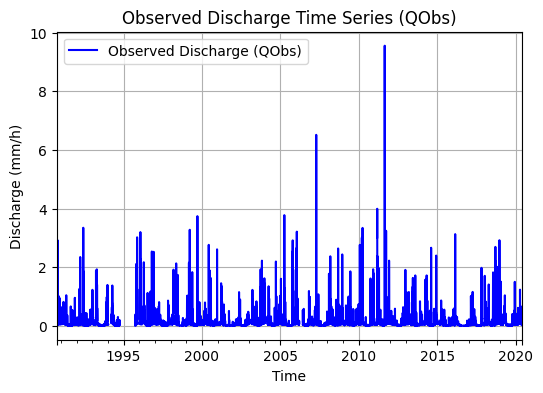

In [7]:
# Block 3: Plot the time series from CSV
plt.figure(figsize=(6, 4))

# Plot the 'QObs(mm/h)' column
df_csv["QObs(mm/h)"].plot(label='Observed Discharge (QObs)', color='blue')

# Add title, labels, and grid
plt.title("Observed Discharge Time Series (QObs)")
plt.xlabel("Time")
plt.ylabel("Discharge (mm/h)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<xarray.Dataset>
Dimensions:     (feature_id: 18917, time: 21474)
Coordinates:
  * time        (time) datetime64[ns] 1980-10-01T01:00:00 ... 1983-03-14T18:0...
  * feature_id  (feature_id) int64 279 280 281 282 ... 13252 13253 13254 13255
Data variables:
    type        (feature_id) object ...
    flow        (feature_id, time) float32 ...
    velocity    (feature_id, time) float32 ...
    depth       (feature_id, time) float32 ...
    nudge       (feature_id, time) float32 ...
Attributes:
    TITLE:                OUTPUT FROM T-ROUTE
    file_reference_time:  1980-10-01_00:00:00
    code_version:         
DatetimeIndex(['1980-10-01 01:00:00', '1980-10-01 02:00:00',
               '1980-10-01 03:00:00', '1980-10-01 04:00:00',
               '1980-10-01 05:00:00', '1980-10-01 06:00:00',
               '1980-10-01 07:00:00', '1980-10-01 08:00:00',
               '1980-10-01 09:00:00', '1980-10-01 10:00:00'],
              dtype='datetime64[ns]', freq=None)


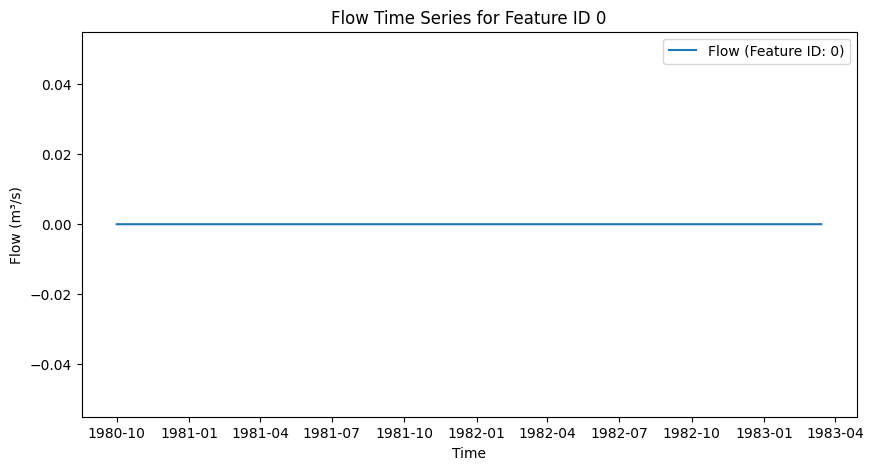

In [7]:
# Block 4: Load NetCDF data and inspect structure
import xarray as xr
import pandas as pd

nc_file_path = "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/troute_output_198010010000.nc"

# Open the NetCDF dataset
ds = xr.open_dataset(nc_file_path)

# Display the dataset structure
print(ds)

# Extract the 'flow' variable and its corresponding time dimension
flow = ds["flow"]
time = ds["time"]

# If needed, convert the time values to pandas DatetimeIndex directly
time_readable = pd.to_datetime(time.values)

# Print the first few time values to verify
print(time_readable[:10])

# Optional: Plot flow for a specific feature over time
import matplotlib.pyplot as plt

# Select a specific feature_id (e.g., the first one)
feature_flow = flow.isel(feature_id=280)

# Plot the flow values over time
plt.figure(figsize=(10, 5))
plt.plot(time_readable, feature_flow, label='Flow (Feature ID: 0)')
plt.xlabel('Time')
plt.ylabel('Flow (m³/s)')
plt.title('Flow Time Series for Feature ID 0')
plt.legend()
plt.show()

In [ ]:
ds.feature_id.shape

In [8]:
# Path to your Parquet file
parquet_file_path = "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/201402010800NEXOUT.parquet"

try:
    # Load the Parquet file into a DataFrame
    df = pd.read_parquet(parquet_file_path)

    # Display the first few rows to inspect the content
    print("Preview of the Parquet File:")
    print(df.head())

    # Print summary information about the DataFrame
    print("\nDataFrame Info:")
    print(df.info())

    # Optionally, list the column names
    print("\nColumn Names:")
    print(df.columns)

except Exception as e:
    print(f"Error reading Parquet file: {e}")

Error reading Parquet file: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.


                     nex-13662  nex-13663  nex-13664  nex-13665
datetime                                                       
1980-10-01 00:00:00   0.054397   0.174027   0.274283   0.283518
1980-10-01 01:00:00   0.064690   0.204737   0.318272   0.296702
1980-10-01 02:00:00   0.068075   0.214219   0.329049   0.313084
1980-10-01 03:00:00   0.069931   0.216485   0.322070   0.299975
1980-10-01 04:00:00   0.068804   0.213119   0.308822   0.286548
                     nex-13662  nex-13663  nex-13664  nex-13665
datetime                                                       
2022-09-29 20:00:00   0.008581   0.042665   0.061281   0.045901
2022-09-29 21:00:00   0.008978   0.042632   0.061142   0.046169
2022-09-29 22:00:00   0.009282   0.043723   0.062169   0.048392
2022-09-29 23:00:00   0.008909   0.043476   0.062402   0.049702
2022-09-30 00:00:00   0.008129   0.041442   0.059695   0.049279


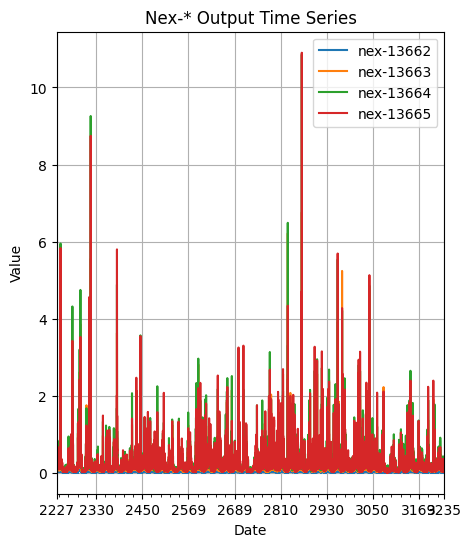

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV files and corresponding nex IDs
csv_files = [
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13662_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13663_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13664_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13665_output.csv"
]
nex_id = [13662, 13663, 13664, 13665]

# Initialize an empty DataFrame to hold the merged data
df_full = pd.DataFrame()

# Loop through each file and process it
for idx, file_path in enumerate(csv_files):
    # Read the CSV without a header
    df = pd.read_csv(file_path, header=None, names=['index', 'datetime', f'nex-{nex_id[idx]}'])

    # Convert the datetime column to a proper datetime format
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Set the datetime column as the index
    df.set_index('datetime', inplace=True)

    # Drop the index column (first column) since it's not needed anymore
    df.drop(columns=['index'], inplace=True)

    # Merge with the full DataFrame, aligning by datetime index
    if df_full.empty:
        df_full = df
    else:
        df_full = df_full.join(df, how='outer')

# Display the combined DataFrame
print(df_full.head())
print(df_full.tail())

# Plot the combined data
df_full.plot(figsize=(5, 6), grid=True)

# Add title and labels
plt.title("Nex-* Output Time Series")
plt.xlabel("Date")
plt.ylabel("Value")

# Format the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Show the plot
plt.show()


NSE Scores:
          ID       NSE
0  nex-13662  0.217548
1  nex-13663  0.534461
2  nex-13664  0.289198
3  nex-13665  0.076757
4   01187300  0.540225


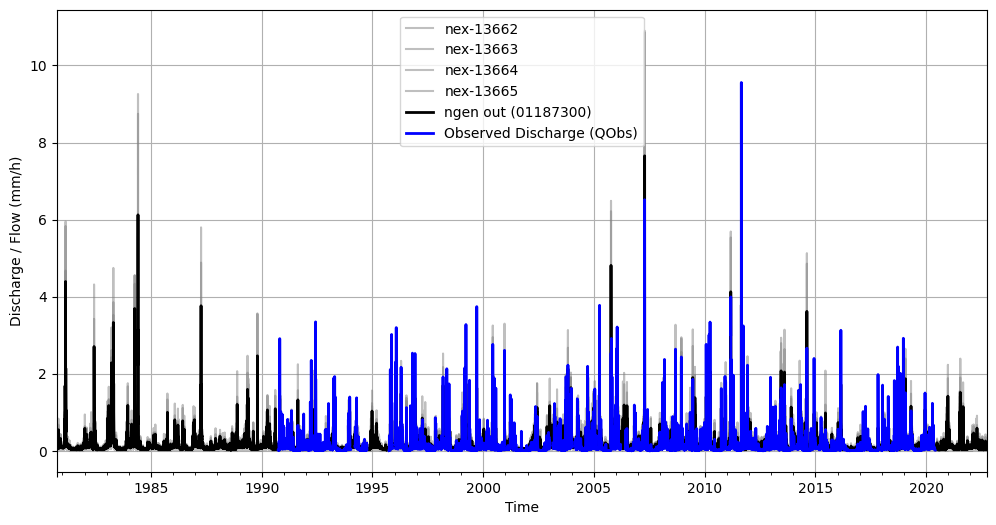

In [22]:
# Function to calculate NSE, handling missing values
def nse_score(observed, simulated):
    # Ensure matching indices
    observed, simulated = observed.align(simulated, join='inner')
    
    # Remove NaN values
    mask = ~observed.isna() & ~simulated.isna()
    observed = observed[mask]
    simulated = simulated[mask]
    
    # Calculate NSE
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - observed.mean()) ** 2)
    return 1 - (numerator / denominator) if denominator != 0 else np.nan

# List of CSV files and their IDs
csv_files = [
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13662_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13663_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13664_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13665_output.csv"
]
nex_id = [13662, 13663, 13664, 13665]

# Initialize an empty DataFrame for combined nex-* data
df_full = pd.DataFrame()

# Loop to read and merge the nex-* output files
for idx, file_path in enumerate(csv_files):
    # Read the CSV without header
    df = pd.read_csv(file_path, header=None, names=['index', 'datetime', f'nex-{nex_id[idx]}'])
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.set_index('datetime', inplace=True)
    df.drop(columns=['index'], inplace=True)

    # Merge with the full DataFrame using an outer join
    if df_full.empty:
        df_full = df
    else:
        df_full = df_full.join(df, how='outer')

# Calculate average discharge across nex-* outputs
df_full["01187300"] = df_full.mean(axis=1)

# Load observed discharge data (QObs)
csv_file_path = "/home/jmframe/data/CAMELS_US/hourly/usgs_streamflow/01187300-usgs-hourly.csv"
df_csv = pd.read_csv(csv_file_path, parse_dates=["date"], index_col="date")

# Calculate NSE for each individual nex-* output and the average discharge
nse_results = []
for col in df_full.columns:
    nse = nse_score(df_csv["QObs(mm/h)"], df_full[col])
    nse_results.append({"ID": col, "NSE": nse})

# Create a DataFrame to display NSE results
nse_df = pd.DataFrame(nse_results)
print("\nNSE Scores:")
print(nse_df)

# Plot both nex-* outputs and observed discharge
plt.figure(figsize=(12, 6))

# Plot individual nex-* outputs in grey
df_full.drop(columns=["01187300"]).plot(ax=plt.gca(), color='grey', alpha=0.5, legend=False)

# Plot average discharge in black
df_full["01187300"].plot(ax=plt.gca(), color='black', linewidth=2, label='ngen out (01187300)')

# Plot observed discharge in blue
df_csv["QObs(mm/h)"].plot(ax=plt.gca(), color='blue', linewidth=2, label='Observed Discharge (QObs)')

# Add labels, title, legend, and grid
plt.xlabel("Time")
plt.ylabel("Discharge / Flow (mm/h)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<Axes: xlabel='datetime'>

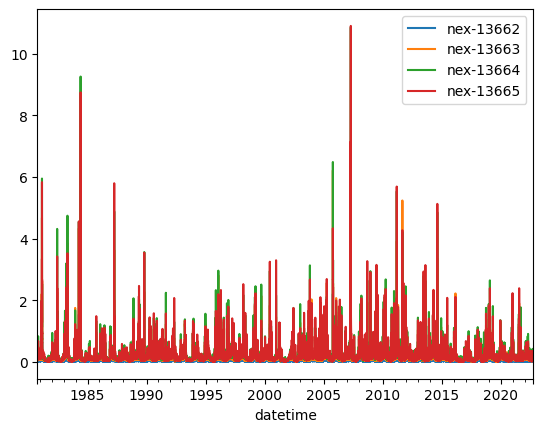

In [11]:
df_full.plot()

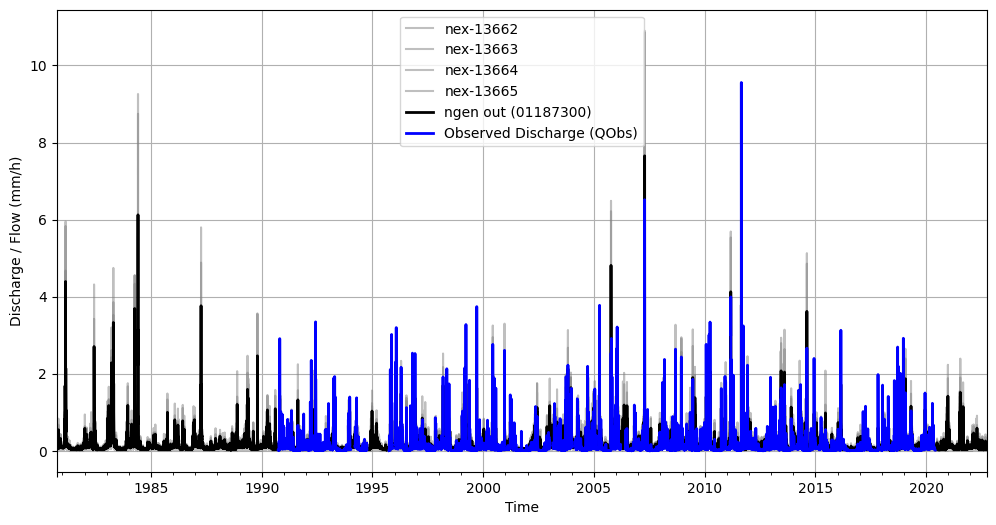

In [12]:
# List of CSV files for nex-* outputs and corresponding IDs
csv_files = [
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13662_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13663_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13664_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13665_output.csv"
]
nex_id = [13662, 13663, 13664, 13665]

# Initialize an empty DataFrame for the combined nex-* data
df_full = pd.DataFrame()

# Loop through each nex-* output file and merge the data
for idx, file_path in enumerate(csv_files):
    # Read the CSV file without a header
    df = pd.read_csv(file_path, header=None, names=['index', 'datetime', f'nex-{nex_id[idx]}'])

    # Ensure the 'datetime' column is parsed correctly
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

    # Set the datetime column as the index
    df.set_index('datetime', inplace=True)

    # Drop the 'index' column
    df.drop(columns=['index'], inplace=True)

    # Merge with the full DataFrame using outer join to retain all datetime values
    if df_full.empty:
        df_full = df
    else:
        df_full = df_full.join(df, how='outer')

# Create a new column '01187300' that averages the individual nex-* columns
df_full["01187300"] = df_full.mean(axis=1)

# Load observed discharge (QObs) data
csv_file_path = "/home/jmframe/data/CAMELS_US/hourly/usgs_streamflow/01187300-usgs-hourly.csv"
df_csv = pd.read_csv(csv_file_path, parse_dates=["date"], index_col="date")

# Plot both the nex-* outputs and observed discharge in the same plot
plt.figure(figsize=(12, 6))

# Plot the individual nex-* output columns in grey
df_full.drop(columns=["01187300"]).plot(ax=plt.gca(), color='grey', alpha=0.5, legend=False)

# Plot the average "01187300" column in black
df_full["01187300"].plot(ax=plt.gca(), color='black', linewidth=2, label='ngen out (01187300)')

# Plot the observed discharge (QObs) on the same axis in blue
df_csv["QObs(mm/h)"].plot(ax=plt.gca(), color='blue', linewidth=2, label='Observed Discharge (QObs)')

# Add title and labels
plt.xlabel("Time")
plt.ylabel("Discharge / Flow (mm/h)")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


NSE Scores for Nex-* Outputs and Average:
               Nex ID       NSE
0           nex-13662  0.568989
1           nex-13663  0.580211
2           nex-13664 -0.460148
3           nex-13665 -1.261175
4  01187300 (Average)  0.409367


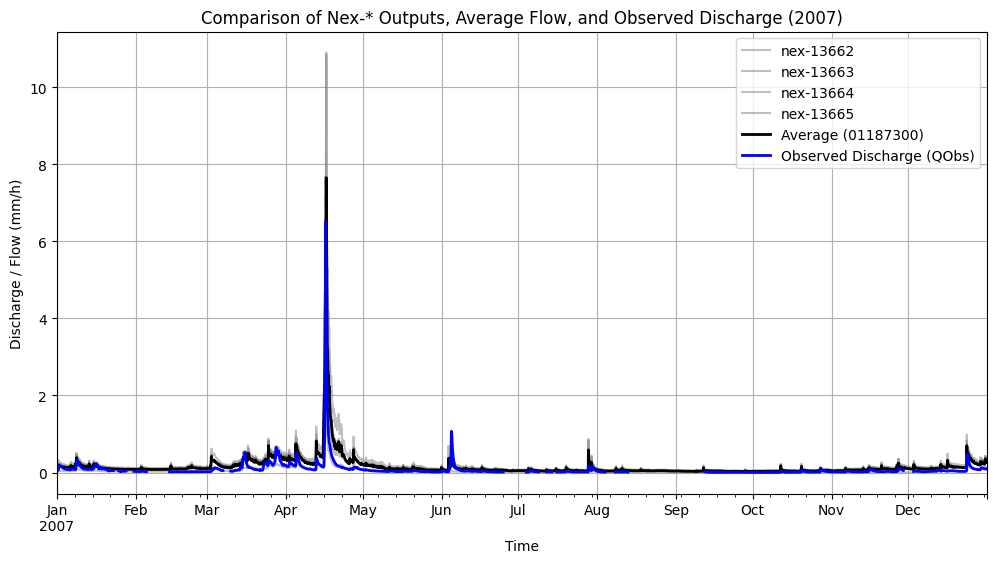

In [13]:
def nse_score(observed, simulated):
    """Calculate the Nash-Sutcliffe Efficiency (NSE) score."""
    return 1 - np.sum((simulated - observed) ** 2) / np.sum((observed - observed.mean()) ** 2)

# List of CSV files for nex-* outputs and corresponding IDs
csv_files = [
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13662_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13663_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13664_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13665_output.csv"
]
nex_id = [13662, 13663, 13664, 13665]

# Initialize an empty DataFrame for the combined nex-* data
df_full = pd.DataFrame()

# Loop through each nex-* output file and merge the data
for idx, file_path in enumerate(csv_files):
    df = pd.read_csv(file_path, header=None, names=['index', 'datetime', f'nex-{nex_id[idx]}'])
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.set_index('datetime', inplace=True)
    df.drop(columns=['index'], inplace=True)
    
    if df_full.empty:
        df_full = df
    else:
        df_full = df_full.join(df, how='outer')

# Create a new column '01187300' that averages the individual nex-* columns
df_full["01187300"] = df_full.mean(axis=1)

# Load observed discharge (QObs) data
csv_file_path = "/home/jmframe/data/CAMELS_US/hourly/usgs_streamflow/01187300-usgs-hourly.csv"
df_csv = pd.read_csv(csv_file_path, parse_dates=["date"], index_col="date")

# Filter data for the year 2007
df_full_2007 = df_full.loc["2007"]
df_csv_2007 = df_csv.loc["2007"]

# Initialize a list to store NSE scores
nse_results = []

# Calculate NSE for each individual nex-* output and the average
for idx in nex_id:
    nse = nse_score(df_csv_2007["QObs(mm/h)"], df_full_2007[f'nex-{idx}'])
    nse_results.append({"Nex ID": f'nex-{idx}', "NSE": nse})

# Calculate NSE for the average column
nse_avg = nse_score(df_csv_2007["QObs(mm/h)"], df_full_2007["01187300"])
nse_results.append({"Nex ID": "01187300 (Average)", "NSE": nse_avg})

# Convert NSE results into a DataFrame and print it
nse_df = pd.DataFrame(nse_results)
print("\nNSE Scores for Nex-* Outputs and Average:")
print(nse_df)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot the individual nex-* output columns in grey
df_full_2007.drop(columns=["01187300"]).plot(ax=plt.gca(), color='grey', alpha=0.5, legend=False)

# Plot the average "01187300" column in black
df_full_2007["01187300"].plot(ax=plt.gca(), color='black', linewidth=2, label='Average (01187300)')

# Plot the observed discharge (QObs) on the same axis in blue
df_csv_2007["QObs(mm/h)"].plot(ax=plt.gca(), color='blue', linewidth=2, label='Observed Discharge (QObs)')

# Add title and labels
plt.title("Comparison of Nex-* Outputs, Average Flow, and Observed Discharge (2007)")
plt.xlabel("Time")
plt.ylabel("Discharge / Flow (mm/h)")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [14]:
# File path to the NetCDF dataset
nc_file_path = "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/troute_output_198010010000.nc"

# Open the NetCDF dataset
ds = xr.open_dataset(nc_file_path)

# Extract the 'flow' variable and its corresponding time dimension
flow = ds["flow"]
time = ds["time"]

# Convert time to pandas DatetimeIndex
time_readable = pd.to_datetime(time.values)

# Check all feature IDs for non-zero flow values
non_zero_features = []

for i in range(flow.sizes['feature_id']):
    feature_flow = flow.isel(feature_id=i).values  # Extract flow for feature_id=i
    if (feature_flow != 0).any():  # Check if there are any non-zero values
        non_zero_features.append(i)

# Print the non-zero feature IDs
if non_zero_features:
    print(f"Feature IDs with non-zero flow: {non_zero_features}")
else:
    print("No feature IDs with non-zero flow values found.")

Feature IDs with non-zero flow: [5175, 5176, 5177, 5178, 5179, 5180, 5181, 5182, 5183, 5184, 5185, 5186, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5194, 5195, 5196, 5335, 5336, 5337, 5338, 5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 5348, 5349, 5451, 5452, 5453, 5454, 5455, 5456, 5457, 5458, 5459, 5460, 5466, 5467, 5469, 5470]


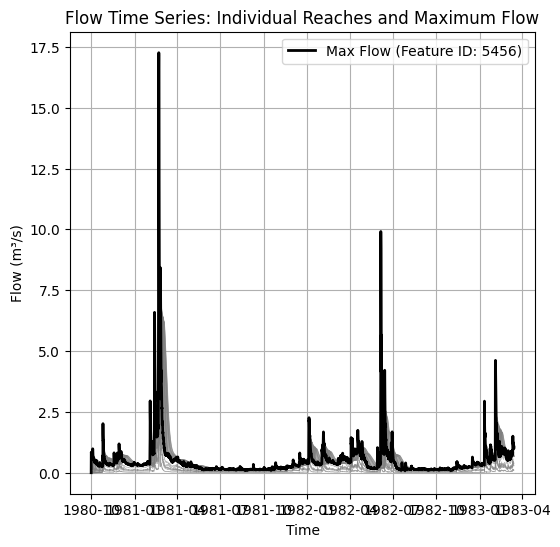

In [15]:
# File path to the NetCDF dataset
nc_file_path = "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/troute_output_198010010000.nc"

# Open the NetCDF dataset
ds = xr.open_dataset(nc_file_path)

# Extract the flow variable and time dimension
flow = ds["flow"]
time_readable = pd.to_datetime(ds["time"].values)

# Initialize a list to store non-zero feature IDs
non_zero_features = []

# Find all non-zero feature flows
for i in range(flow.sizes["feature_id"]):
    feature_flow = flow.isel(feature_id=i).values
    if (feature_flow != 0).any():
        non_zero_features.append(i)

# Find the feature ID with the maximum flow across all time points
max_flow_id = None
max_flow_value = -float('inf')

for i in non_zero_features:
    feature_flow = flow.isel(feature_id=i).values
    current_max = feature_flow.max()

    if current_max > max_flow_value:
        max_flow_value = current_max
        max_flow_id = i

# Plot all individual flows in grey
plt.figure(figsize=(6, 6))
for i in non_zero_features:
    feature_flow = flow.isel(feature_id=i).values
    plt.plot(time_readable, feature_flow, c='grey', lw=0.5, alpha=0.5)

# Highlight the maximum flow in black
max_flow = flow.isel(feature_id=max_flow_id).values
plt.plot(time_readable, max_flow, c='black', lw=2, label=f'Max Flow (Feature ID: {max_flow_id})')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Flow (m³/s)')
plt.title('Flow Time Series: Individual Reaches and Maximum Flow')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

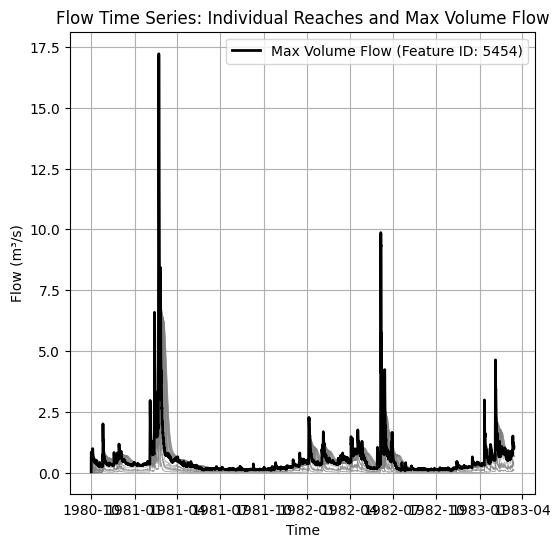

Feature ID with highest total volume: 5454
Total volume: 10526.814453125 m³


In [16]:
# File path to the NetCDF dataset
nc_file_path = "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/troute_output_198010010000.nc"

# Open the NetCDF dataset
ds = xr.open_dataset(nc_file_path)

# Extract the flow variable and time dimension
flow = ds["flow"]
time_readable = pd.to_datetime(ds["time"].values)

# Initialize a list to store non-zero feature IDs
non_zero_features = []

# Find all non-zero feature flows
for i in range(flow.sizes["feature_id"]):
    feature_flow = flow.isel(feature_id=i).values
    if (feature_flow != 0).any():
        non_zero_features.append(i)

# Identify the feature ID with the highest total volume output
max_volume_id = None
max_volume_value = -float('inf')

for i in non_zero_features:
    feature_flow = flow.isel(feature_id=i).values
    total_volume = feature_flow.sum()  # Sum of all flow values across time

    if total_volume > max_volume_value:
        max_volume_value = total_volume
        max_volume_id = i

# Plot all individual flows in grey
plt.figure(figsize=(6, 6))
for i in non_zero_features:
    feature_flow = flow.isel(feature_id=i).values
    plt.plot(time_readable, feature_flow, c='grey', lw=0.5, alpha=0.5)

# Highlight the flow with the highest total volume in black
max_volume_flow = flow.isel(feature_id=max_volume_id).values
plt.plot(time_readable, max_volume_flow, c='black', lw=2, 
         label=f'Max Volume Flow (Feature ID: {max_volume_id})')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Flow (m³/s)')
plt.title('Flow Time Series: Individual Reaches and Max Volume Flow')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Output the ID of the max volume feature and the total volume
print(f"Feature ID with highest total volume: {max_volume_id}")
print(f"Total volume: {max_volume_value} m³")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


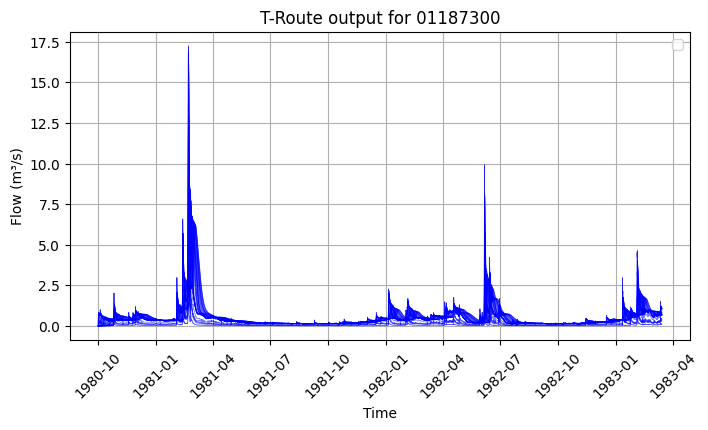

Feature ID with longest high flow: 5335
Duration of high flow: 21474 time steps


In [24]:
# File path to the NetCDF dataset
nc_file_path = "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/troute_output_198010010000.nc"

# Open the NetCDF dataset
ds = xr.open_dataset(nc_file_path)

# Extract the flow variable and time dimension
flow = ds["flow"]
time_readable = pd.to_datetime(ds["time"].values)

# Initialize a list to store non-zero feature IDs
non_zero_features = []

# Find all non-zero feature flows
for i in range(flow.sizes["feature_id"]):
    feature_flow = flow.isel(feature_id=i).values
    if (feature_flow != 0).any():
        non_zero_features.append(i)

# Identify the feature ID with the longest sustained high flow
max_duration_id = None
max_duration_value = -float('inf')

for i in non_zero_features:
    feature_flow = flow.isel(feature_id=i).values
    # Count the number of non-zero (or high) flow values over time
    duration = (feature_flow > 0).sum()

    if duration > max_duration_value:
        max_duration_value = duration
        max_duration_id = i

# Plot all individual flows in grey
plt.figure(figsize=(8, 4))
for i in non_zero_features:
    feature_flow = flow.isel(feature_id=i).values
    plt.plot(time_readable, feature_flow, c='b', lw=0.5, alpha=0.5)

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Flow (m³/s)')
plt.title('T-Route output for 01187300')
plt.legend()
plt.xticks(rotation=45) 
# Display the plot
plt.grid(True)
plt.show()


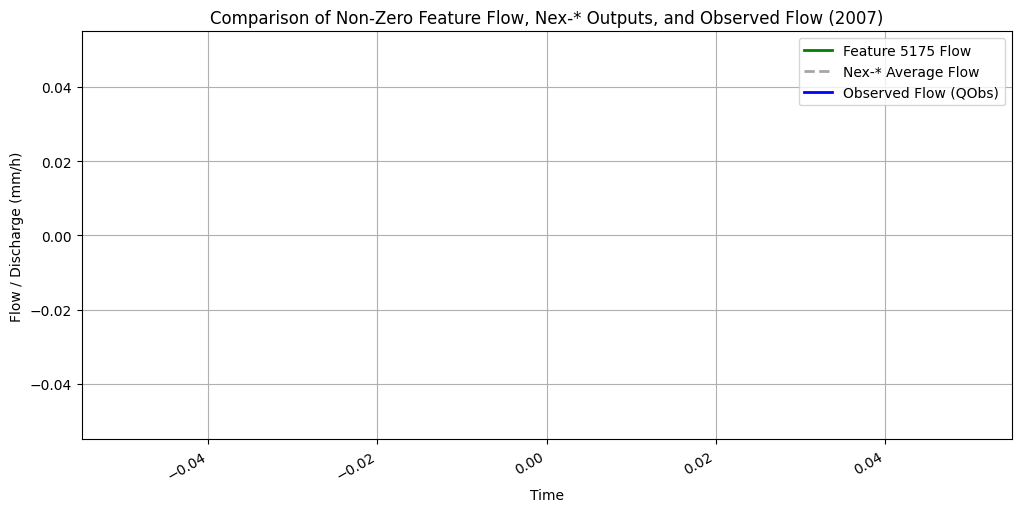

In [18]:
# File paths
nc_file_path = "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/troute_output_198010010000.nc"
csv_files = [
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13662_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13663_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13664_output.csv",
    "/home/jmframe/ngen/extern/lstm/ngen_output/01187300/nex-13665_output.csv"
]
observed_flow_path = "/home/jmframe/data/CAMELS_US/hourly/usgs_streamflow/01187300-usgs-hourly.csv"

# 1. Load the NetCDF file and extract non-zero flow
ds = xr.open_dataset(nc_file_path)
flow = ds["flow"]
time = pd.to_datetime(ds["time"].values)

# Find the first non-zero feature ID
for i in range(flow.sizes["feature_id"]):
    feature_flow = flow.isel(feature_id=i).values
    if (feature_flow != 0).any():
        non_zero_id = i
        break

# Create a DataFrame for the non-zero feature flow
df_nc = pd.DataFrame({"datetime": time, f"Feature_{non_zero_id}": feature_flow}).set_index("datetime")

# 2. Load the nex-* outputs into a DataFrame
df_nex = pd.DataFrame()

for file in csv_files:
    nex_id = file.split("-")[1].split("_")[0]  # Extract nex ID from filename
    df = pd.read_csv(file, header=None, names=["index", "datetime", f"nex-{nex_id}"])
    df["datetime"] = pd.to_datetime(df["datetime"])
    df.set_index("datetime", inplace=True)
    df_nex = df_nex.join(df[[f"nex-{nex_id}"]], how="outer") if not df_nex.empty else df[[f"nex-{nex_id}"]]

# Create an average column for nex-* outputs
df_nex["nex_avg"] = df_nex.mean(axis=1)

# 3. Load observed flow data from CAMELS dataset
df_obs = pd.read_csv(observed_flow_path, parse_dates=["date"], index_col="date")

# 4. Combine the DataFrames for overlapping time periods
combined_df = df_nc.join(df_nex[["nex_avg"]], how="inner").join(df_obs[["QObs(mm/h)"]], how="inner")

# Filter for the year 2007
combined_df_2007 = combined_df.loc["2007"]

# 5. Plot the combined data
plt.figure(figsize=(12, 6))

# Plot non-zero feature flow
combined_df_2007[f"Feature_{non_zero_id}"].plot(ax=plt.gca(), color='green', linewidth=2, label=f'Feature {non_zero_id} Flow')

# Plot nex-* average flow
combined_df_2007["nex_avg"].plot(ax=plt.gca(), color='grey', linestyle='--', linewidth=2, alpha=0.7, label='Nex-* Average Flow')

# Plot observed flow
combined_df_2007["QObs(mm/h)"].plot(ax=plt.gca(), color='blue', linewidth=2, label='Observed Flow (QObs)')

# Add title and labels
plt.title("Comparison of Non-Zero Feature Flow, Nex-* Outputs, and Observed Flow (2007)")
plt.xlabel("Time")
plt.ylabel("Flow / Discharge (mm/h)")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()